##STEP 1: Import Libraries and Load Dataset

In [711]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [712]:
sal_data=pd.read_csv("dataset.csv")
sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [713]:
sal_data.shape

(375, 6)

In [714]:
sal_data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [715]:
sal_data.columns=['Age','Gender',"Degree","Job_Title","Experience_Years","Salary"]

In [716]:
sal_data.dtypes

,0
Age,float64
Gender,object
Degree,object
Job_Title,object
Experience_Years,float64
Salary,float64


##STEP 2: Data Preprocessing and Cleaning

In [717]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Degree            373 non-null    object 
 3   Job_Title         373 non-null    object 
 4   Experience_Years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [718]:
sal_data[sal_data.duplicated()].shape

(50, 6)

In [719]:
sal_data1=sal_data.drop_duplicates(keep="first")
sal_data1.shape

(325, 6)

In [720]:
sal_data1.isnull().sum()


,0
Age,1
Gender,1
Degree,1
Job_Title,1
Experience_Years,1
Salary,1


In [721]:
sal_data1.dropna(how='any',inplace=True)

/tmp/ipython-input-721-4249426051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1.dropna(how='any',inplace=True)


In [722]:
sal_data1.shape

(324, 6)

In [723]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_Years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


##STEP 3: Data Exploration and Visualisation

In [724]:
sal_data1.describe()


,Age,Experience_Years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [725]:
corr=sal_data[['Age','Experience_Years','Salary']].corr()
corr

,Age,Experience_Years,Salary
Age,1.000000,0.979128,0.922335
Experience_Years,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


<Axes: >

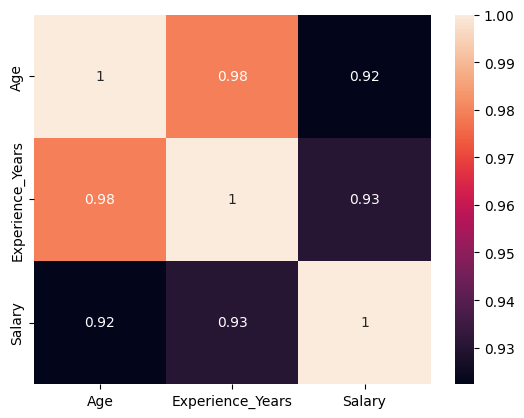

In [726]:
sns.heatmap(corr,annot=True)

In [727]:
sal_data1['Degree'].value_counts()

,count
Degree,
Bachelor's,191
Master's,91
PhD,42


<Axes: xlabel='Degree'>

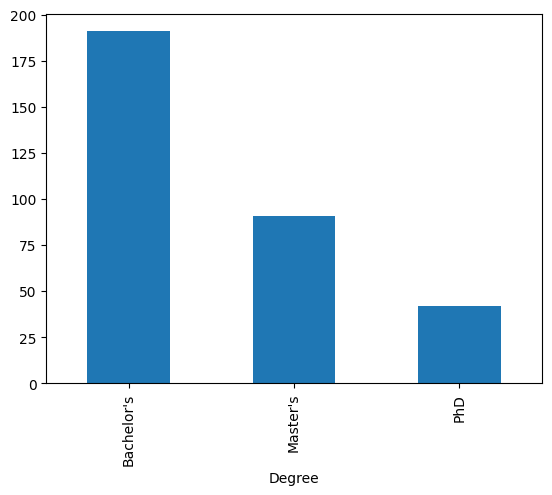

In [728]:
sal_data1['Degree'].value_counts().plot(kind='bar')

In [729]:
sal_data1['Job_Title'].value_counts()

,count
Job_Title,
Director of Operations,9
Director of Marketing,8
Senior Marketing Manager,8
Senior Project Manager,7
Senior Data Scientist,6
...,...
Junior Social Media Specialist,1
Junior Operations Coordinator,1
Senior HR Specialist,1


<Axes: ylabel='Gender'>

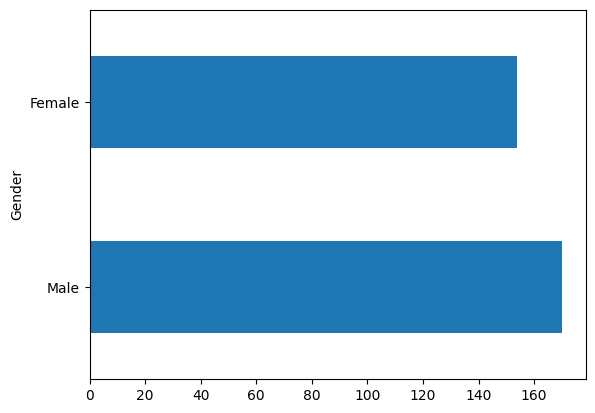

In [730]:
sal_data1['Gender'].value_counts().plot(kind="barh")

<Axes: ylabel='Frequency'>

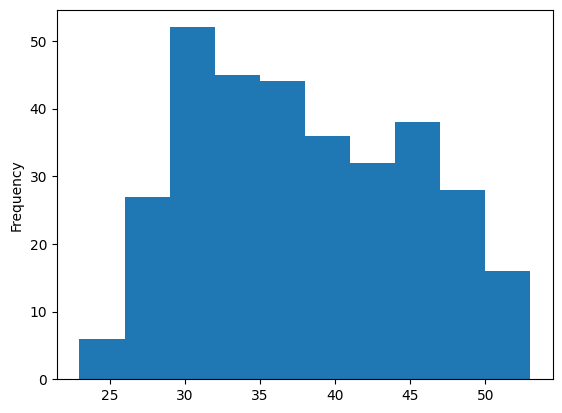

In [731]:
sal_data1.Age.plot(kind="hist")

<Axes: >

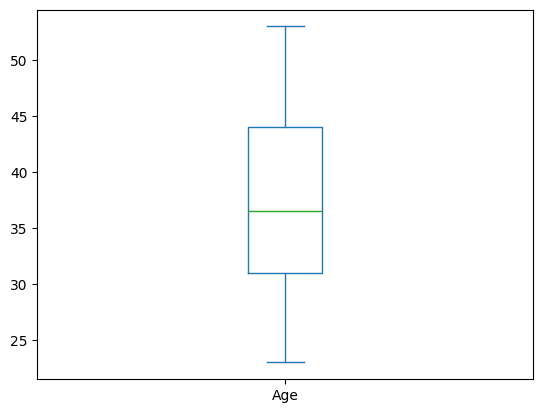

In [732]:
sal_data1.Age.plot(kind='box')

<Axes: ylabel='Frequency'>

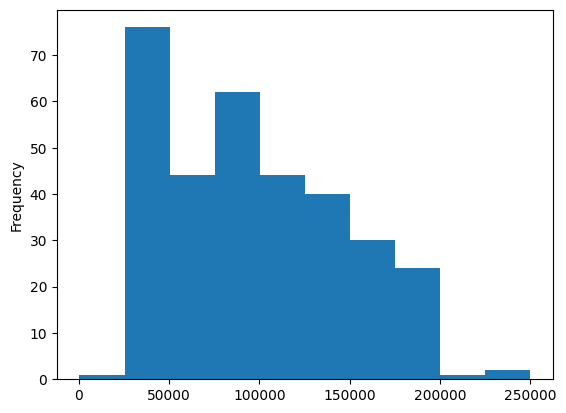

In [733]:
sal_data1.Salary.plot(kind="hist")

##STEP 4: Feature Engineering

In [734]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()

In [735]:
sal_data1['Gender_Encode']=Label_Encoder.fit_transform(sal_data1['Gender'])

/tmp/ipython-input-735-1708347298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Gender_Encode']=Label_Encoder.fit_transform(sal_data1['Gender'])


In [736]:
sal_data1['Degree_Encode']=Label_Encoder.fit_transform(sal_data1['Degree'])

/tmp/ipython-input-736-742768987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Degree_Encode']=Label_Encoder.fit_transform(sal_data1['Degree'])


In [737]:
sal_data1['Job_Title_Encode']=Label_Encoder.fit_transform(sal_data1['Job_Title'])

/tmp/ipython-input-737-2018311369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Job_Title_Encode']=Label_Encoder.fit_transform(sal_data1['Job_Title'])


In [738]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_Years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


In [739]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [740]:
sal_data1['Age_scaled']=std_scaler.fit_transform(sal_data1[["Age"]])
sal_data1['Experience_Years_scaled']=std_scaler.fit_transform(sal_data1[["Experience_Years"]])

/tmp/ipython-input-740-618938566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Age_scaled']=std_scaler.fit_transform(sal_data1[["Age"]])
/tmp/ipython-input-740-618938566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Experience_Years_scaled']=std_scaler.fit_transform(sal_data1[["Experience_Years"]])


In [741]:
sal_data1[['Gender_Encode', 'Degree_Encode', 'Job_Title_Encode', 'Age_scaled', 'Experience_Years_scaled']].head()


,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_Years_scaled
0,1,0,159,-0.750231,-0.761821
1,0,1,17,-1.307742,-1.063017
2,1,2,130,1.061680,0.744158
3,0,0,101,-0.192720,-0.460625
4,1,1,22,2.037324,1.497148


In [742]:
x=sal_data1[['Age_scaled','Gender_Encode','Degree_Encode','Job_Title_Encode','Experience_Years_scaled']]
y=sal_data1['Salary']


In [743]:
x.head(3)

,Age_scaled,Gender_Encode,Degree_Encode,Job_Title_Encode,Experience_Years_scaled
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158


In [744]:
y.head(3)

,Salary
0,90000.0
1,65000.0
2,150000.0


##STEP 5 : Splitting Data into Training and Testing Sets


In [745]:
from sklearn.model_selection import train_test_split


In [746]:
x_train, x_test, y_train , y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [747]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(259, 5) (65, 5) (259,) (65,)


##Step 6: Model Building and Training


In [748]:
from sklearn.ensemble import RandomForestRegressor


In [749]:
rf_model = RandomForestRegressor()

In [750]:
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [751]:
y_pred=rf_model.predict(x_test)

In [752]:
from sklearn.metrics import r2_score

In [753]:
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Accuracy: {r2 * 100:.2f}%")


Random Forest Accuracy: 91.25%


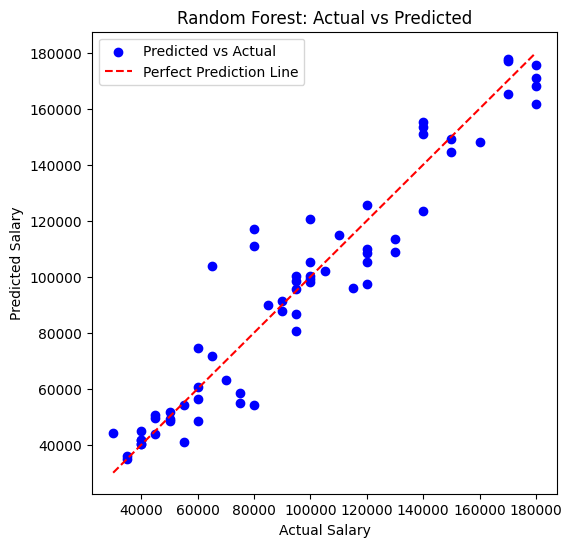

In [754]:
# Scatter plot for Random Forest
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Prediction Line")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()
plt.show()


In [755]:
from sklearn.linear_model import LinearRegression

In [756]:
lr_model = LinearRegression()

In [757]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [758]:
y_pred = lr_model.predict(x_test)

In [759]:
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Accuracy: {r2 * 100:.2f}%")

Random Forest Accuracy: 89.11%


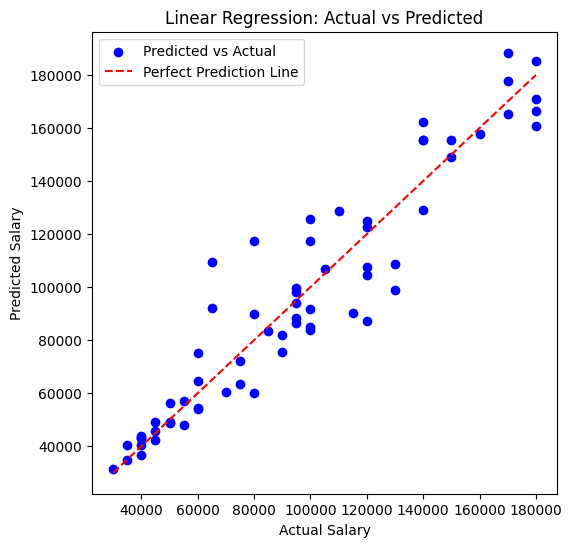

In [760]:
# Scatter plot for Linear Regression
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Prediction Line")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [761]:
from sklearn.ensemble import GradientBoostingRegressor

In [762]:
gb_model = GradientBoostingRegressor()

In [763]:
gb_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [764]:
y_pred = gb_model.predict(x_test)

In [765]:
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Accuracy: {r2 * 100:.2f}%")

Random Forest Accuracy: 91.75%


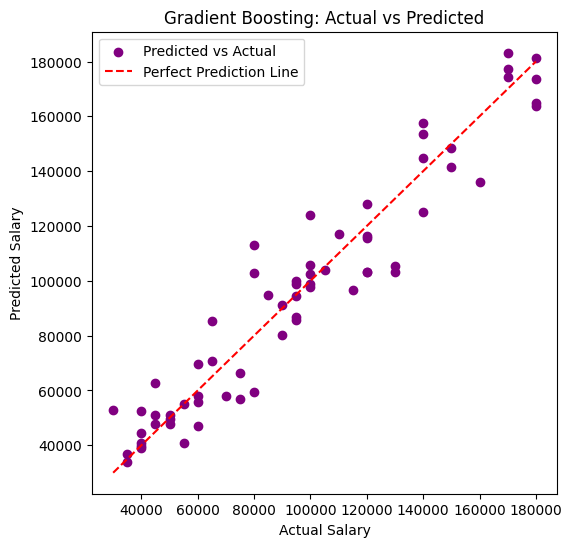

In [766]:
# Scatter plot for Gradient Boosting
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color="purple", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Prediction Line")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.legend()
plt.show()


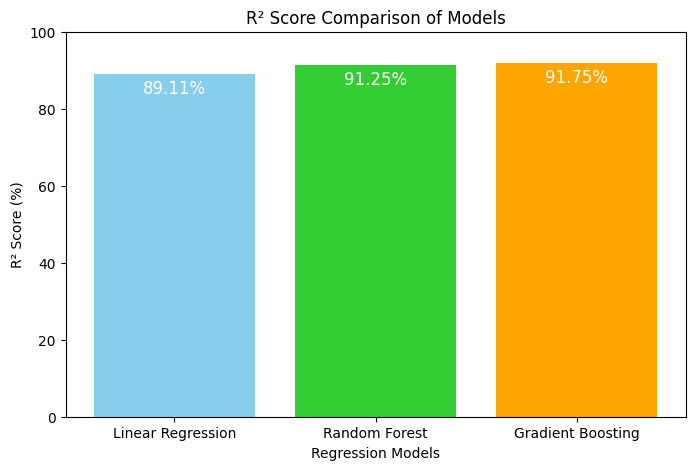

In [767]:
import matplotlib.pyplot as plt

# Actual R² scores (replace these with your computed values if needed)
r2_linear = lr_model.score(x_test, y_test) * 100
r2_random = rf_model.score(x_test, y_test) * 100
r2_gradient = gb_model.score(x_test, y_test) * 100

# Data for plotting
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
r2_scores = [r2_linear, r2_random, r2_gradient]

# Plotting
plt.figure(figsize=(8,5))
bars = plt.bar(models, r2_scores, color=['skyblue', 'limegreen', 'orange'])
plt.title('R² Score Comparison of Models')
plt.xlabel('Regression Models')
plt.ylabel('R² Score (%)')
plt.ylim(0, 100)

# Annotate scores on bars
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5,
             f"{score:.2f}%", ha='center', color='white', fontsize=12)

plt.show()


##STEP 7 :Testing Models

In [768]:
Age = 0.75            # Real Age: 35 years
Gender = 1            # Real Gender: Male
Degree = 2            # Real Degree: PhD
Job_Title = 120       # Real Job Title: Senior Data Scientist
Experience_years = 0.60  # Real Experience: 12 years

# Predict salary
Emp_salary = rf_model.predict([[Age, Gender, Degree, Job_Title, Experience_years]])
print("Predicted Salary (Random Forest):", Emp_salary[0])


Predicted Salary (Random Forest): 140500.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [769]:
print("Salary of Employee with above attributes is ",Emp_salary[0])

Salary of Employee with above attributes is  140500.0


In [770]:
Age = -0.45           # Real Age: 28 years
Gender = 0            # Real Gender: Female
Degree = 1            # Real Degree: Master's
Job_Title = 45        # Real Job Title: Data Analyst
Experience_years = -0.80  # Real Experience: 3 years

# Predict salary
Emp_salary = lr_model.predict([[Age, Gender, Degree, Job_Title, Experience_years]])
print("Predicted Salary (Linear Regression):", Emp_salary[0])


Predicted Salary (Linear Regression): 77859.89321711544


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [771]:
Age = 1.25            # Real Age: 48 years
Gender = 1            # Real Gender: Male
Degree = 0            # Real Degree: Bachelor's
Job_Title = 200       # Real Job Title: Director of Operations
Experience_years = 1.50  # Real Experience: 20 years

# Predict salary
Emp_salary = gb_model.predict([[Age, Gender, Degree, Job_Title, Experience_years]])
print("Predicted Salary (Gradient Boosting):", Emp_salary[0])


Predicted Salary (Gradient Boosting): 120329.73101648514


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
